<a href="https://colab.research.google.com/github/S-HATANO1970/otemae/blob/main/%E9%87%8D%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

          income       age     years
income  1.000000  0.341151  0.355702
age     0.341151  1.000000  0.960506
years   0.355702  0.960506  1.000000
      sex department estimate  age  years  income  Excellent  Good  Poor
0    Male  Marketing     Poor   58     36      36        0.0   0.0   1.0
1    Male    Finance     Good   48     26     113        0.0   1.0   0.0
2    Male  Marketing     Poor   34     12      28        0.0   0.0   1.0
3  Female    Finance     Good   62     40      96        0.0   1.0   0.0
4    Male         IT     Poor   27      5      29        0.0   0.0   1.0
R: 0.3557069448390488
R2: 0.1265274306067301
Adjusted R2: 0.10851768690789987
SE: 39.809367826142946
               b         SE         t         P
const  45.108439  27.045695  1.667860  0.098569
age    -0.019333   1.013757 -0.019071  0.984824
years   1.049733   0.989056  1.061348  0.291167


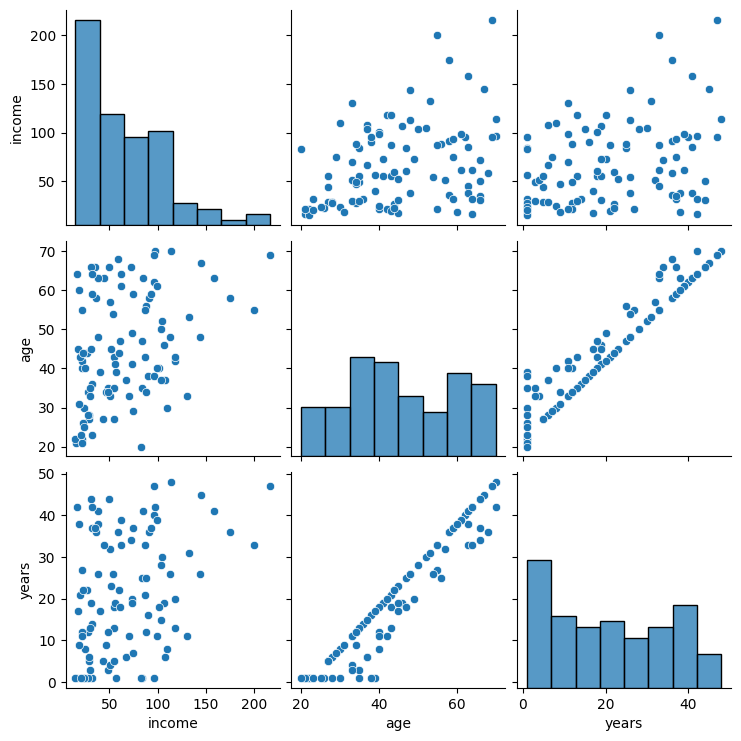

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("https://kyoto-edu.sakura.ne.jp/weblesson/python/data/income.csv").dropna()

print(data[["income", "age", "years"]].corr())

#評価["estimate"]をダミー変数化
dummies = pd.get_dummies(data["estimate"], drop_first=True)
dummies = dummies.astype(float)
data = pd.concat([data, dummies], axis=1)

print(data.head())

y = data["income"].astype(float)
X = data[["age","years"]]

#評価(ダミー変数)を用いる場合
#X = data[["age","years","Excellent","Good","Poor"]]

XwithIntercept = sm.add_constant(X)
model = sm.OLS(y, XwithIntercept).fit()
summary = {
            "R": model.rsquared ** 0.5,
            "R2": model.rsquared,
            "Adjusted R2": model.rsquared_adj,
            "SE": model.mse_resid ** 0.5
        }

coefficients_df = pd.DataFrame({
            "b": model.params,
            "SE": model.bse,
            "t": model.tvalues,
            "P": model.pvalues
        })

for key, value in summary.items():
    print(f"{key}: {value}")

print(coefficients_df)

sns.pairplot(data[["income", "age", "years",]])
#評価(ダミー変数)を用いる場合
#sns.pairplot(data[["income", "age", "years", "estimate"]], hue="estimate")

plt.show()